<h1>Perceptrón</h1>

In [1]:
import numpy as np

def hardlim(x):
    return np.where(x >= 0, 1, 0)

def neurona(X, w, b):
    return hardlim(np.dot(X, w) + b)

def test_perceptron(X, w, b):
    yp = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        yp[i] = neurona(X[i], w, b)
    return yp

def train_perceptron(X, y):
    w = np.array([1.0, -0.8])
    b = 0
    
    yp = test_perceptron(X, w, b)
    
    while not np.array_equal(yp, y):
        yp = test_perceptron(X, w, b)
        if not np.array_equal(yp, y):
            diff = y - yp
            indices = np.where(diff != 0)[0]
            yp_s = yp[indices]
            y_s = y[indices]
            X_s = X[indices]
            
            w = w + (y_s[0] - yp_s[0]) * X_s[0]
            b = b + (y_s[0] - yp_s[0])
            
        yp = test_perceptron(X, w, b)

    return w, b, yp

In [2]:
import matplotlib.pyplot as plt

# Definición de los datos de entrenamiento
X = np.array([[1, -1, 0], [2, 2, -1]]).T
Y = np.array([1, 0, 0])

# Entrenamiento del perceptrón
w, b, _ = train_perceptron(X, Y)

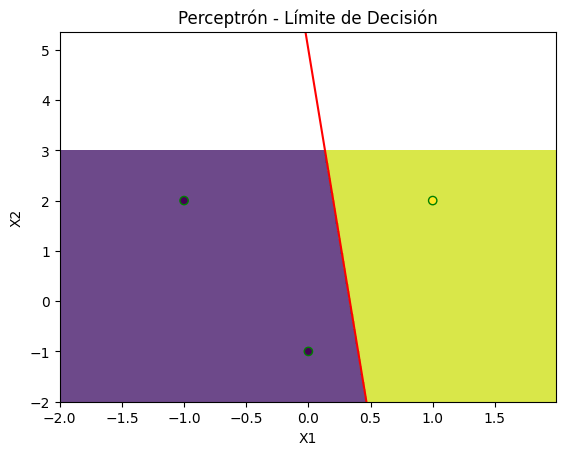

In [3]:
# Preparación de datos para la visualización
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predicciones para cada punto en la malla
Z = neurona(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

# Crear gráfico
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='g')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptrón - Límite de Decisión')

# Línea del límite de decisión
slope = -w[0]/w[1]
intercept = -b/w[1]
plt.axline(xy1=(0, intercept), slope=slope, color='red')

plt.show()